In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
df = pd.read_csv("traffic volume.csv")
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Convert date to datetime and extract features
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour
df.drop(columns=["date", "Time"], inplace=True)

# Define features and target
X = df.drop(columns=["traffic_volume"])
y = df["traffic_volume"]

# Identify categorical and numerical features
categorical_features = ["holiday", "weather"]
numerical_features = ["temp", "rain", "snow", "month", "day", "hour"]

# Preprocessing pipeline
num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer([("num", num_pipeline, numerical_features), ("cat", cat_pipeline, categorical_features)])


In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = Pipeline([("preprocessor", preprocessor), ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'rain', 'snow',
                                                   'month', 'day', 'hour']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['holiday', 'weather'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [5]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 537.27
Mean Squared Error: 709145.37
R² Score: 0.82


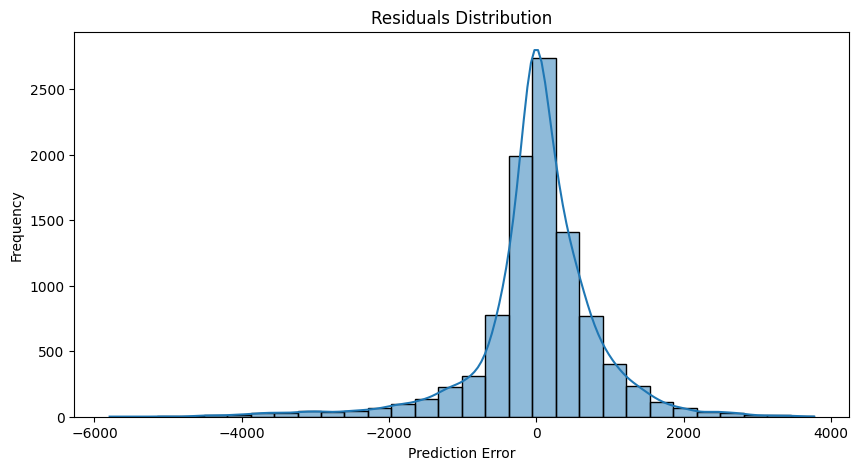

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [7]:
joblib.dump(model, "traffic_model.pkl")
print("Model saved as traffic_model.pkl")

Model saved as traffic_model.pkl


In [8]:
from google.colab import files
files.download("traffic_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>